# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

%matplotlib notebook

data = pd.read_csv("previsao_de_renda.csv")

In [2]:
data

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


<IPython.core.display.Javascript object>


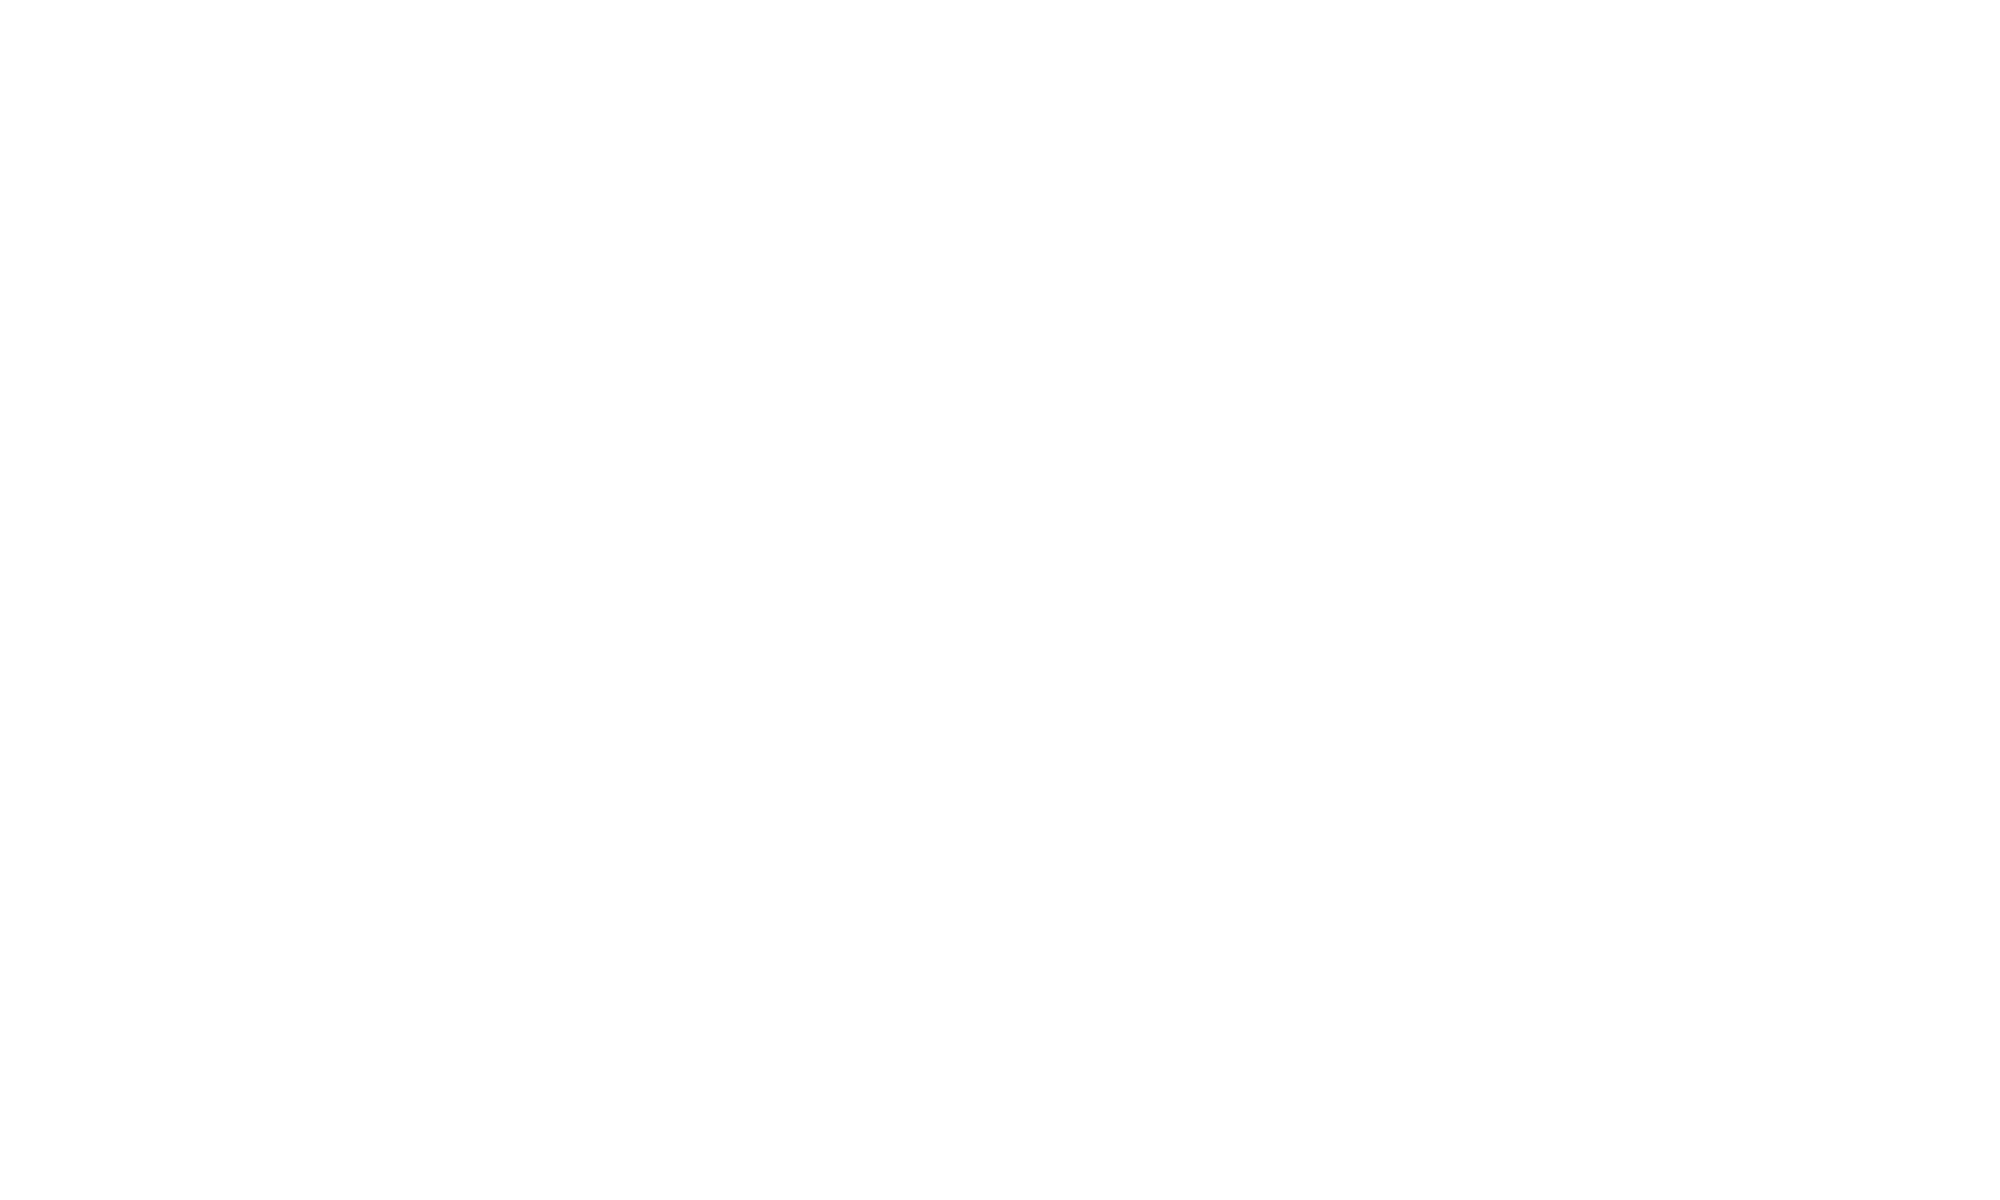

<IPython.core.display.Javascript object>


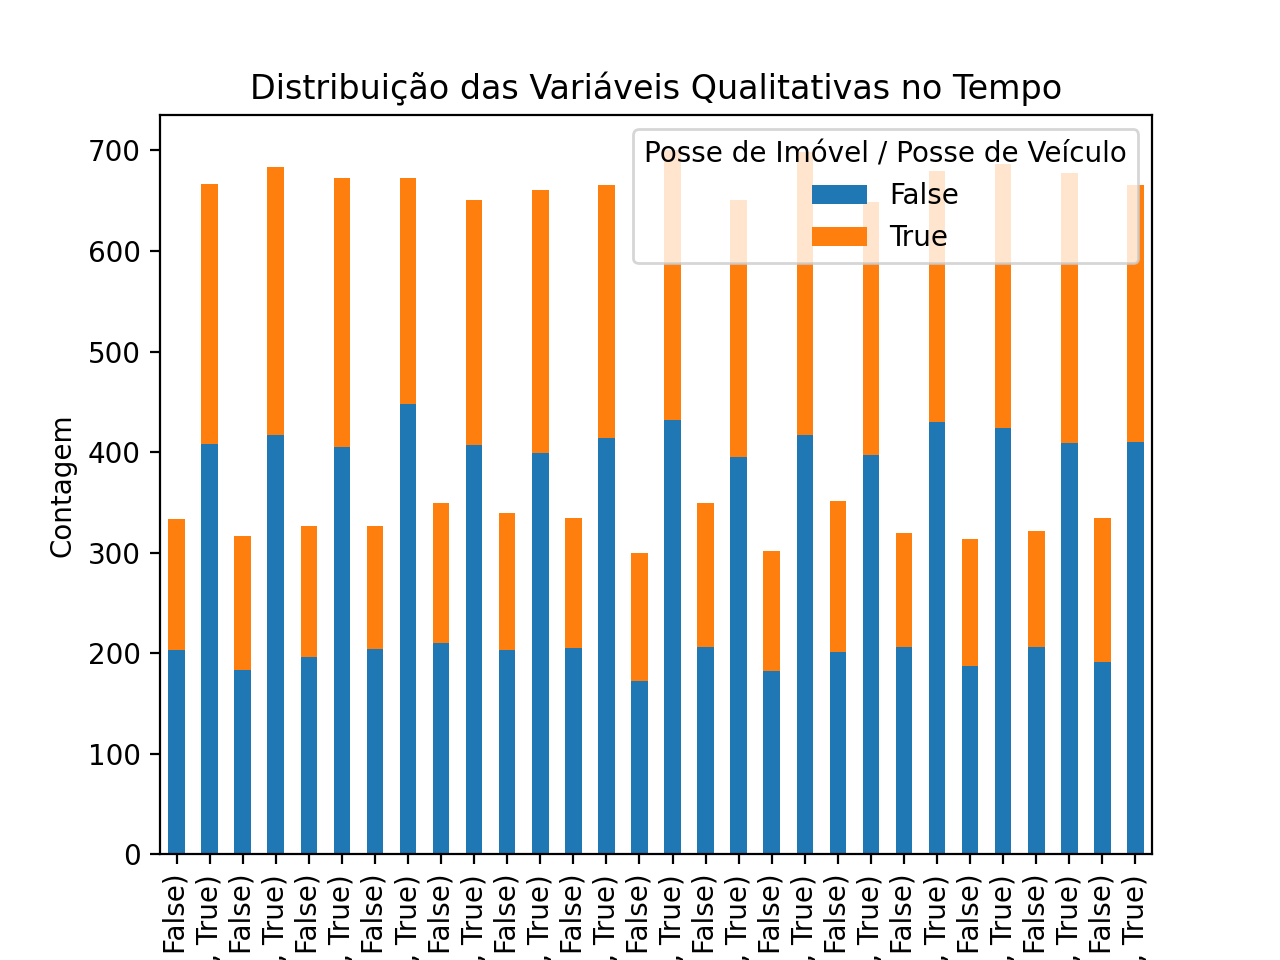

In [10]:
# Criar o gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
data.groupby(['data_ref', 'posse_de_imovel', 'posse_de_veiculo']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Tempo')
plt.ylabel('Contagem')
plt.title('Distribuição das Variáveis Qualitativas no Tempo')
plt.legend(title='Posse de Imóvel / Posse de Veículo', loc='upper right')
plt.show()

In [12]:
import pandas as pd

# Carregar os dados
data = pd.read_csv('previsao_de_renda.csv')

# Contagem da variável qualitativa 'posse_de_imovel' por período de tempo
posse_imovel_counts = data.groupby('data_ref')['posse_de_imovel'].value_counts().unstack().fillna(0)

# Contagem da variável qualitativa 'posse_de_veiculo' por período de tempo
posse_veiculo_counts = data.groupby('data_ref')['posse_de_veiculo'].value_counts().unstack().fillna(0)

# Exibir as tabelas de contagem
print("Distribuição da Posse de Imóvel por Período de Tempo:")
print(posse_imovel_counts)

print("\nDistribuição da Posse de Veículo por Período de Tempo:")
print(posse_veiculo_counts)


Distribuição da Posse de Imóvel por Período de Tempo:
posse_de_imovel  False  True 
data_ref                     
2015-01-01         333    667
2015-02-01         317    683
2015-03-01         327    673
2015-04-01         327    673
2015-05-01         349    651
2015-06-01         339    661
2015-07-01         334    666
2015-08-01         300    700
2015-09-01         349    651
2015-10-01         302    698
2015-11-01         351    649
2015-12-01         320    680
2016-01-01         314    686
2016-02-01         322    678
2016-03-01         334    666

Distribuição da Posse de Veículo por Período de Tempo:
posse_de_veiculo  False  True 
data_ref                      
2015-01-01          611    389
2015-02-01          600    400
2015-03-01          601    399
2015-04-01          652    348
2015-05-01          617    383
2015-06-01          602    398
2015-07-01          619    381
2015-08-01          604    396
2015-09-01          601    399
2015-10-01          599    401
2015-11-

Ao observar os resultados, percebe-se poucas alterações ao longo do tempo, com as variáveis se mantendo relativamente consistente ao longo do tempo, não indicando padrões claros de aumento ou diminuição significativa em nenhuma das categorias.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

<IPython.core.display.Javascript object>


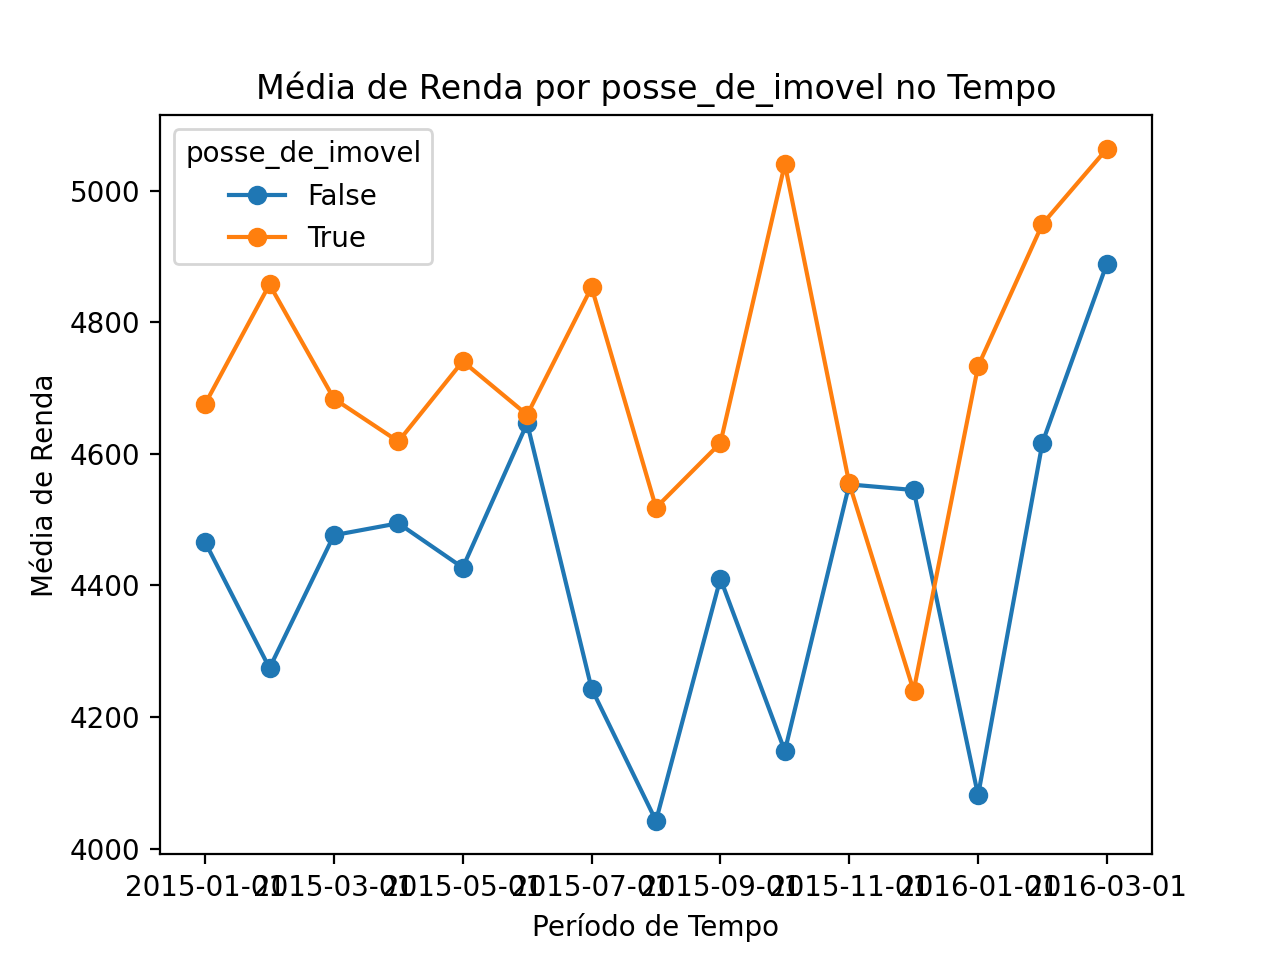

<IPython.core.display.Javascript object>


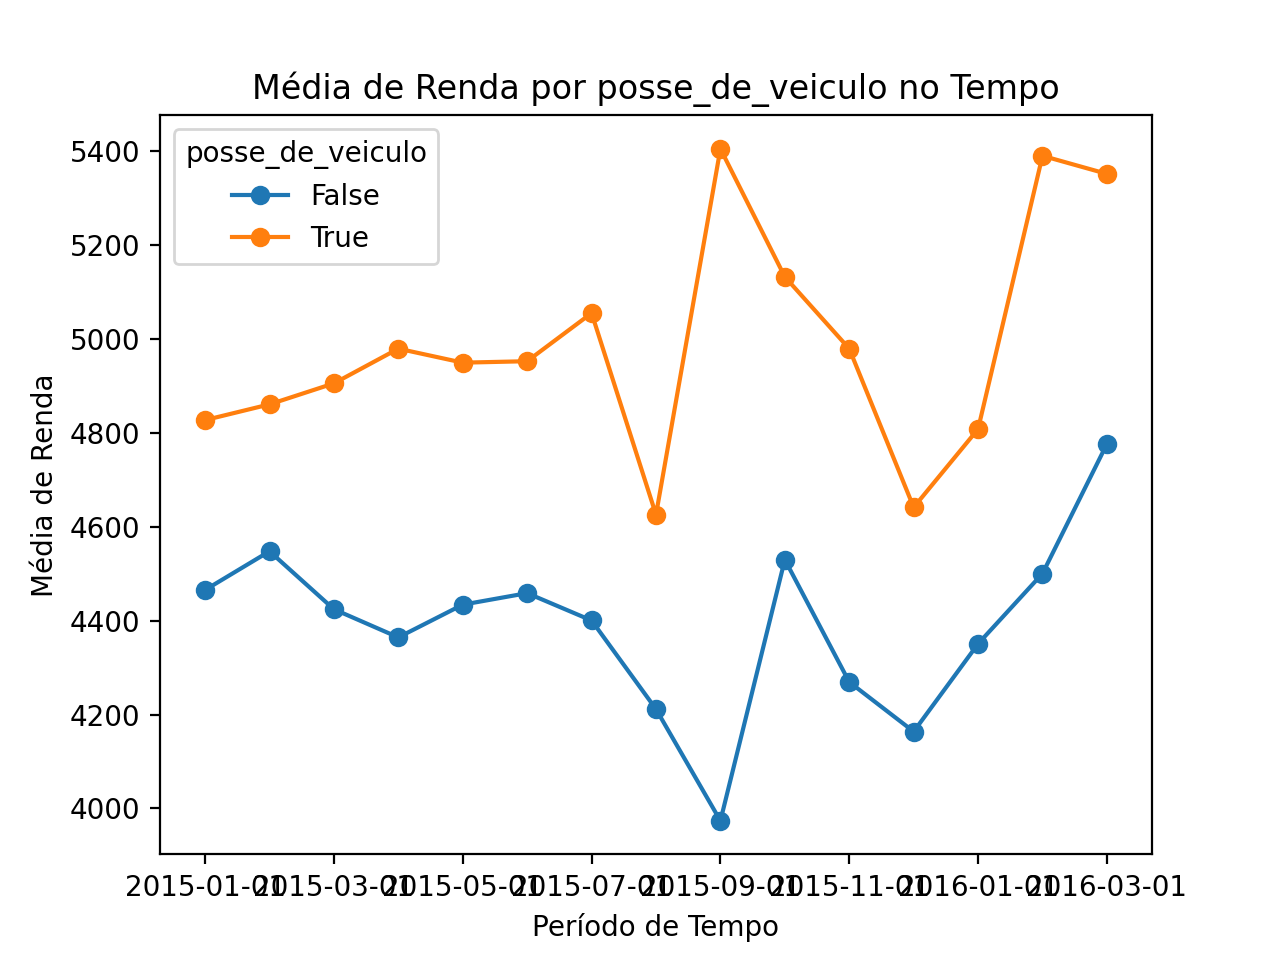

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('previsao_de_renda.csv')

# Definir as variáveis qualitativas e o tempo
variables = ['posse_de_imovel', 'posse_de_veiculo']
time_variable = 'data_ref'

# Criar um gráfico para cada variável qualitativa
for variable in variables:
    # Calcular a média para cada nível da variável no tempo
    mean_data = data.groupby([time_variable, variable])['renda'].mean().unstack()
    
    # Plotar o gráfico de linha
    mean_data.plot(kind='line', marker='o')
    
    # Configurar o título e rótulos dos eixos
    plt.title(f'Média de Renda por {variable} no Tempo')
    plt.xlabel('Período de Tempo')
    plt.ylabel('Média de Renda')
    
    # Exibir o gráfico
    plt.show()

In [17]:
import pandas as pd

# Carregar os dados
data = pd.read_csv('previsao_de_renda.csv')

# Definir as variáveis qualitativas e o tempo
variables = ['posse_de_imovel', 'posse_de_veiculo']
time_variable = 'data_ref'

# Criar um dicionário para armazenar as tabelas de resultados
result_tables = {}

# Iterar sobre as variáveis qualitativas
for variable in variables:
    # Calcular a média para cada nível da variável no tempo
    mean_data = data.groupby([time_variable, variable])['renda'].mean().unstack()
    
    # Adicionar a tabela de resultados ao dicionário
    result_tables[variable] = mean_data

# Exibir as tabelas de resultados
for variable, table in result_tables.items():
    print(f"Resultados para a variável {variable}:\n")
    print(table)
    print("\n")

Resultados para a variável posse_de_imovel:

posse_de_imovel        False        True 
data_ref                                 
2015-01-01       4466.039429  4675.891424
2015-02-01       4274.337886  4857.689561
2015-03-01       4476.432049  4683.978915
2015-04-01       4494.560703  4618.899762
2015-05-01       4427.137937  4740.824531
2015-06-01       4646.622507  4659.397428
2015-07-01       4243.200419  4853.494550
2015-08-01       4042.180867  4518.255843
2015-09-01       4410.488281  4616.643641
2015-10-01       4148.296457  5040.773023
2015-11-01       4553.667322  4555.076641
2015-12-01       4545.099312  4239.859309
2016-01-01       4080.878312  4733.439767
2016-02-01       4617.300280  4949.688761
2016-03-01       4889.308862  5063.929760


Resultados para a variável posse_de_veiculo:

posse_de_veiculo        False        True 
data_ref                                  
2015-01-01        4465.324141  4826.986272
2015-02-01        4547.635867  4860.463900
2015-03-01        442

Com esses resultados, podemos notar uma tendência de estabilidade na posse de imóvel ao longo do tempo, enquanto a posse de veículo apresenta uma tendência crescente.
Em relação à utilização dessas variáveis em uma modelagem, é possível considerá-las como preditoras da variável alvo (renda), especialmente a 'posse_de_veiculo', que apresentou uma relação mais aparente com a renda.